In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

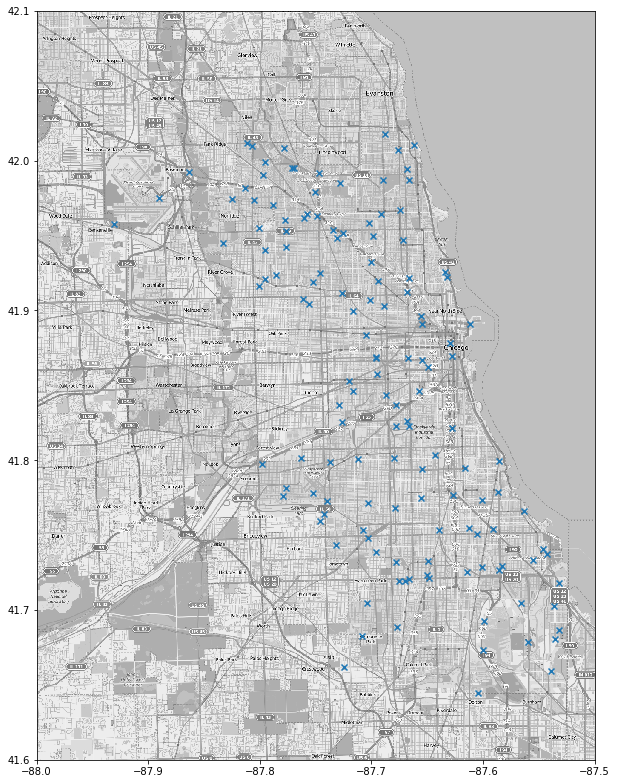

In [185]:
mapdata = np.loadtxt("../input/mapdata_copyright_openstreetmap_contributors.txt")
trapsloc = pd.read_csv('../input/train.csv')[['Longitude', 'Latitude']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = trapsloc.drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.show()

**Vizualizacija mesta in nastavljenih pasti za komarje**
Slika predstavlja mesta na katerih so postavljene pasti v mestu Chikago. Te pasti so sredstvo vseh mojih podarkov o komarjih saj vsaka dnevno zbira podatke o vrsti in šrevilu posameznih komarjev ujetih v posamezno past ti komarji so tudi testirani za prisotnost virusa.

In [179]:
data=pd.read_csv('../input/train.csv')
weather=pd.read_csv('../input/weather.csv')
spray=pd.read_csv('../input/spray.csv')
data.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [182]:
weather.head(1)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2


In [183]:
spray.head(1)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163


** Okvirji uporabnih podatkovnih struktur pri predikciji**

In [26]:
data.Species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

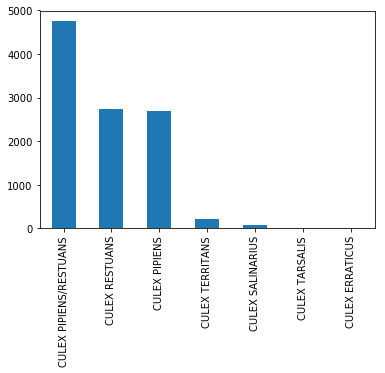

In [186]:
data.Species.value_counts().plot(kind="bar")

**razporeditev frekvence ujetih komarjev glede na vrsto**

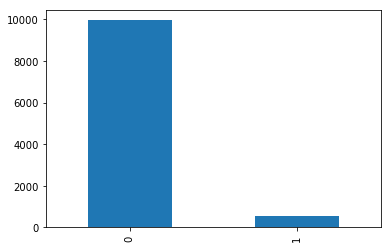

In [187]:
data.WnvPresent.value_counts().plot(kind="bar")

In [188]:
data.WnvPresent.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [191]:
(9955-551)/9955

0.9446509291813159

**podatki so skrajno skrivljeni** večinski klasifikator nam da verjetnost 0.95% da komar ni okužen torej bo za naš problem mira clasifikacijske točnosti dokaj neuporabna. Zato se zaradi praktične zasnovanosti problema naeravam problem ocenjevati glede na priklic in preciznost saj je napaka neprimerno manjša če ocenimo, da je neokužen komar okužen kot pa obratno.

In [178]:
a=data.groupby(["Species"])["Species"].count().reset_index(name='All')
b=data[data.WnvPresent==1].groupby("Species")["Species"].count().reset_index(name='Infected')
a=a.merge(b,on="Species",how="left")
a.fillna(int(0), inplace=True)
a.Infected=a.Infected.astype(int)
a["Ipr"]=(a["Infected"]/a["All"])*100
a

,Species,All,Infected,Ipr
0,CULEX ERRATICUS,1,0,0.000000
1,CULEX PIPIENS,2699,240,8.892182
2,CULEX PIPIENS/RESTUANS,4752,262,5.513468
3,CULEX RESTUANS,2740,49,1.788321
4,CULEX SALINARIUS,86,0,0.000000
5,CULEX TARSALIS,6,0,0.000000
6,CULEX TERRITANS,222,0,0.000000


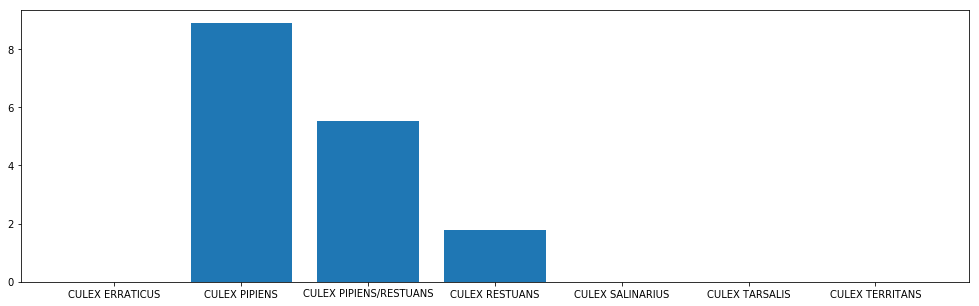

In [199]:
ind=np.arange(7)
plt.figure(figsize=(17, 5))
plt.bar(ind,tick_label=(a["Species"]),height=(a["Ipr"])) 
plt.show()

**Prikaz verjetnosti, da je komar okužen glede na vrsto komarja** Iz vizualizacije je razvidno, da je verjetnost da je komar vrste  CULEX PIPENIS več kot 4 krat večja kot da je okužena najpogostejša vrsta komarja CULEX RESTUANS. Pri ostalih vrstah ni bilo zazanti okužbe vendar so ostale vrste zastopane v bistveno manjšem številu kar bi lahko bil razlog za takšne rezultate.